# **PX920 -Micromechanics of Materials Tutorial 1**

### *This notebook is read-only. Please make a copy that you can edit!*

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

<div class="alert alert-block alert-info">

## Problem 1

For well-dispersed particle-like reinforced two-phase systems, a model was proposed by [Takanayagi et al. (1964)](https://onlinelibrary.wiley.com/doi/10.1002/polc.5070050111), where particles of phase 2 are dispersed in Phase 1.

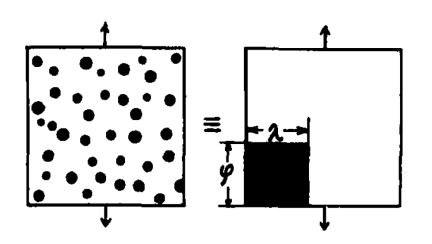
    
When the system is subjected to tension, part of the force passes only through phase 1 and the other part through both the phases in series - both phases are well connected with each other, so no interfacial damage is allowed. The parameters  $\lambda$ and $\varphi$ are related to the mixing state and the composition of the sample. For spherical particles these two parameters are related to the volume fraction of phase 2, $V_2$, as 
$$
\lambda = \frac{2+3V_2}{5}
$$
$$
\varphi = \frac{5V_2}{2+3V_2} 
$$

Two simple mechancial models (a) and (b) are considered for calculating the effective modulus. It has been proven by model experiments that model (a) is more suitable.

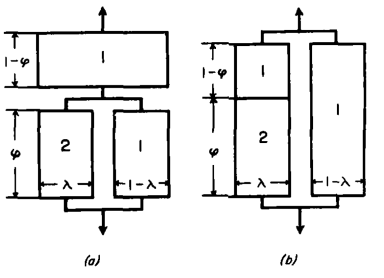
    
### Task 1
Derive a formula for an effective Young's modulus in the direction of the load.
    
<div>

### Task 2
Write a simple python script that calculates the Voigt and Reuss averages. Test your analytical expression for values from between $V_2 = 0.0$ to $V_2 = 1.0$. 

Assume the following elastic properties for the phases:

$E_1 = 100\text{GPa}$

$E_2 = 300\text{GPa}$

<div class="alert alert-block alert-danger">
    
#### Solution 
    
The formulae for the Voigt and Reuss averages are respectively the  arithmetic and harmonic averages of the phase moduli. These are relatively simple expressions and can be defined like so:
<div>

In [ ]:
# Voigt and Ruess bounds
def voigt(E1, E2, phi1):
    raise NotImplementedError
def reuss(E1, E2, phi1):
    raise NotImplementedError

# Young's moduli
E1 = ...
E2 = ...

# Calculate bounds
V2 = ... # Volume fraction range
v = ... # upper bound
r = ... # lower bound

# Plot
plt.title("Effective modulus - Voigt and Reuss bounds")
plt.plot(V2, v, "-", c='y', label='Voigt')
plt.plot(V2, r, '-', c='g', label='Reuss')
plt.legend()
plt.show()

Now implement the Takanayagi model [model (a)] and compare with bounds

In [ ]:
# Takanayagi model
lam = ... 
phi = ...
t = ...

#plot all together
plt.title("Effective modulus - all models")
plt.plot(V2, v, "-", c='y', label='Voigt')
plt.plot(V2, r, '-', c='g', label='Reuss')
plt.plot(V2, t, "-", c='r', label='Takanayagi')
plt.legend()
plt.show()

## Problem 2

<div class="alert alert-block alert-info">

Consider an RVE domain where constitutent materials A and B are
randomly distributed. Assume that each material phase is embedded
within a single finite-element (FE) of unit dimensions.

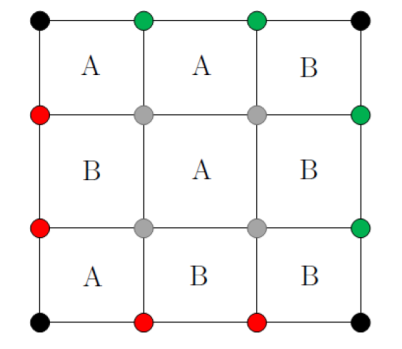
    
Implement the generalized Voigt and Reuss bounds into a FE-like solution procedure, given the properties of A and B:

$E_1 = 100\text{GPa}$, $\nu_1 = 0.2$

$E_2 = 300\text{GPa}$, $\nu_2 = 0.1$

and evaluate the corresponding effective elasticity matrices for the system.
<div>
   

## Introduction to Object-Oriented Programming

This is an optional introduction to object-oriented programming OOP in python. The problems in this tutorial may be solved using the traditional imperative style you are familiar with from previous programming courses, but OOP serves as a very useful methodology for building complex programs like the one you will be expected to build for your final project.

#### Why use OOP 
* It makes your programs more modular: you know exactly where to look if your programs go wrong.
* Provides an intuitive new view on programming in terms of interactions between defined **objects**.
* It is the dominant style of programming in the python ecosystem. Most of the libraries that you are familiar with are built as objects.

### Defining an object
Python has a range of types that you will be familiar with. `int`, `float` and `str` are examples of these types. 

Some functions only apply to a particular type. Python objects of the `float` type, for instance, has an inbuilt method called `is_integer`, which returns `True` if that float has an integer representation.

In [ ]:
x = 3.15134 # a float that cannot be represented by an integer.
print(x.is_integer())

y = 3.00 # a float that can be represented as an integer
print(y.is_integer())

Think of objects as *user-defined* types, equipped with user-defined methods. In reality, it is the other way round: **everything** in python is an object, including types!

Below is the `Parrot` object, defined from scratch. Note the two components of an object:
* Attributes, which are the properties of an object.
* Methods, which is a procedure associated with the object.

In [ ]:
class Parrot:
    # the initialisation procedure
    def __init__(self, name, age):
        # ATTRIBUTES:
        # below are the initial attributes that must be defined when creating a parrot object.
        self.name = name # name of parrot
        self.age = age # age of parrot
        
        # the colour attribute is not defined upon initialisation.
        # it will instead be defined by a method. The attributes of objects can be modified.
        self.colour = None 
        
        # here, we define a variable *without* the self parameter.
        # this cannot be accessed outside of the init function!
        beak_size = random.randrange(0,10)
        
        # this, however, can be accessed outside the object.
        self.danger_level = beak_size**2
        
    def squawk(self,):
        """
        Prompts the parrot to introduce itself.
        (prints the name of the parrot)
        """
        print(f"Hello, my name is {self.name}!")
        
        if self.colour == None:
            print("I'm not sure what my colour is...")
        else:
            print(f"I am coloured {self.colour}.")
            
        if self.danger_level > 25:
            print("I'm very dangerous!")
        else:
            print("I'm not dangerous!")
        
    def set_colour(self, colour):
        """
        Sets the colour for the Parrot
        """
        self.colour = colour 

The most important thing to note here is the use of the `self` keyword.

**This is the self-referential parameter.** As you might be able to tell from the name, it allows the object to refer to itself.
* You must define all the attributes in your object as self.{attribute}, *including* the attributes the object is initialised with.
* If you want to use an attribute from an object in a method, the first parameter of the method must be `self`.

**Note that variables within an object can only be accessed if they are attributes** - that is, they have been defined with the `self.` keyword. In many occasions, this is a good thing: it allows you to simplify the actual use of an object.


Here is how this object is used:

In [ ]:
my_parrot = Parrot("Richard", 13)
my_parrot.squawk()
print("...")
my_parrot.set_colour("blue")
my_parrot.squawk()

## Applying OOP to Problem 2

You'll be needing the FE Mesh from PX912 to solve Problem 2. Seeing as this tool will see extensive use in the next few weeks, let's implement it as an object.

### Step 1: Defining the Object
Recall that the parameters required for the mesh tool as the following:
* `bot` - the x-coordinates along the bottom-side nodes
* `top`- the x-coordinates along the top-side nodes
* `left` - the y-coordinates along the left-side nodes
* `right` - the y-coordinates along the right-side nodes

In [ ]:
class Mesh:
    # the initialisation procedure
    def __init__(self, bot, top, left, right):
        self.bot = bot
        self.top = top
        self.left = left
        self.right = right

It would be quite nice if the mesh was generated immediately upon initialisation. So, let's make it happen.

The defining values of our mesh are:
* `XYZ`- array of nodal coordinates [number of elements x 2]
* `CON` -array of node numbers for elements (linear QUADS [number of elements x 4])
* `DOF`- array of element degrees of freedom (4-node (linear) quadrilateral element - [number of elements x 8])

In [ ]:
class Mesh:
    # the initialisation procedure
    def __init__(self, bot, top, left, right):
        self.bot = bot
        self.top = top
        self.left = left
        self.right = right
        
        # number of nodes and elements in the domain
        nnodesx = len(bot)                     # number of horizontal nodes
        nnodesy = len(left)                    # number of vertical nodes 
        nelx = nnodesx-1                       # number of horizontal elements
        nely = nnodesy-1                       # number of vertical elements
        nnodes = nnodesx*nnodesy               # total number of nodes    
        
        # dimensions of the domain
        lx = bot[nnodesx-1] - bot[0]           # length of the domain in x-direction (horizontal)
        ly = left[nnodesy-1] - left[0]         # length of the domain in y-direction (vertical)
        
        # GENERATE COORDINATES OF NODES 'XYZ'
        self.XYZ = np.zeros((nnodes,2))         # two-column array [nnodes x 2] containing all nodal coordinates  
        for i in range(nnodesy):                # loop over all nodes on the vertical sides 
            yl = left[i] - left[0]              # distance between node 'i' and left-bottom node '1'
            dy = right[i] - left[i]             # distance between the corresponing nodes j on top and bottom 
            for j in range(nnodesx):            # loop over all nodes on the horizontal sides
                xb = bot[j] - bot[0]            # distance between node 'j' and bottom-left node '1' 
                dx = top[j] - bot[j]            # distance between nodes 'j' on opposite sides (top and bottom)

                x = (dx*yl+xb*ly)/(ly-dx*dy/lx) # x-coordinate (horizontal) of a node in the interior of the domain
                y = dy/lx*x+yl                  # y-coordinate (vertical) of a node in the interior of the domain

                self.XYZ[j+i*nnodesx, 0] = x + bot[0]  # coordinate 'x' in the global coordinate system 
                self.XYZ[j+i*nnodesx, 1] = y + left[0] # coordinate 'y' in the global coordinate system

        # NODE NUMBERS FOR ELEMENTS 
        nel = nelx*nely                              # total number of elements in the domain
        self.CON = np.zeros((nel,4), dtype=int)           # [nel*4] array of node number for each element
        for i in range(nely):                        # loop over elements in the vertical direction 
            for j in range(nelx):                    # loop over elements in the horizontal direction 
                # element 'el' and corresponding node numbers
                self.CON[j+i*nelx, :] = [j+i*nnodesx, j+i*nnodesx+1,j+(i+1)*nnodesx+1, j+(i+1)*nnodesx] 

        # Global DOF for each element (4-node (linear) quadrilateral element)
        self.DOF = np.zeros((nel,2*4), dtype=int)
        for i in range(nel):
            # defines single row of DOF for each element 'i'
            self.DOF[i,:] = [self.CON[i,0]*2, self.CON[i,1]*2-1, self.CON[i,1]*2, \
                             self.CON[i,1]*2+1, self.CON[i,2]*2, self.CON[i,2]*2+1, \
                             self.CON[i,3]*2, self.CON[i,3]*2+1]

Now we can initialise our object without any difficulty.

In [ ]:
bot = [0, 0.5, 1, 1.5]
top = [0, 0.5, 1, 1.5]
left = [0, 0.5, 1, 1.5]
right = [0, 0.5, 1, 1.5]

my_mesh = Mesh(bot, top, left, right)

print(my_mesh.XYZ)
print(my_mesh.CON)
print(my_mesh.DOF)

Amazing! Now let's add a method that will allow us to plot our mesh.

### Step 2: Adding a plotting method
As `XYZ`, `CON` and `DOF` are now implicitly calculated within the function, all that is required is that `self.` be added in front of each to access their values.

Below is the plotting code.

In [ ]:
def meshplot(self):
    # plot the mesh 
    plt.plot(self.XYZ[:, 0], self.XYZ[:, 1], 'sk')

    for i in range(len(self.CON)):
        plt.fill(self.XYZ[self.CON[i, :], 0], self.XYZ[self.CON[i, :], 1], edgecolor='k', fill=False)

    for i in range(4):                             #loop over all nodes within an element
        for j in range(len(self.CON)):                  #loop over all elements
            sh=0.01
            plt.text(self.XYZ[self.CON[j,i],0]+sh, self.XYZ[self.CON[j,i],1]+sh, self.CON[j,i])

    # Set chart title.
    plt.title("Mesh", fontsize=19)
    # Set x axis label.
    plt.xlabel("$x_1$", fontsize=10)
    # Set y axis label.
    plt.ylabel("$x_2$", fontsize=10)
    # Set size of tick labels.
    plt.tick_params(axis='both', which='major', labelsize=9)

    plt.show()

# Usually, the method is defined within the class.
# Below however is a method to initialise functions outside of the class. It suits the jupyter notebook functionality.
# I would not recommend it: it's usually less confusing to initialise your methods within the class you're defining.
Mesh.meshplot = meshplot

And there we have it! When armed with OOP, complex code is reduced to simple, modular pieces. The code above can now *very* easily be simplified and reused. 

In [ ]:
bot = [0, 1, 2, 3]
top = [0, 1, 2, 3]
left = [0, 1, 2, 3]
right = [0, 1, 2, 3]

my_mesh = Mesh(bot, top, left, right)
my_mesh.meshplot()

## The Effective Elasticity Matrix and Voigt-Reuss Bounds


Over to you. To solve this problem, you'll need to build the following additional functions:
* A routine that builds the plane-strain matrix.
* A routine that builds the Jacobian matrix. 

You'll also need to find a way of encoding the material phases into the mesh structure. This can be very easily done using OOP.

Build the function into the `Mesh` class using the syntax
`Mesh.voigt_reuss = {name of your function}`.


<div class="alert alert-block alert-danger">
    
#### Solution
First, encode material data ($E$ and $\nu$) for each element as a list with the same dimension as the length of `CON`. Alternately, you can change the class and make it so that the class is defined such that the material data for each element must be defined upon initialisation.
    
<div>

In [ ]:
yA = 100e9
pA = 0.2
yB = 300e9
pB = 0.1

Mesh.youngs = ...
Mesh.poisson = ...

<div class="alert alert-block alert-danger">
Now define functions for the Plane Strain and the Jacobian.
<div>

In [ ]:
def plane_strain(E,nu):
    """ calculates plane strain for an element. """   
    plane_strain = ...
        
    return plane_strain

def jacobian(xyze,xi,eta):    
    # natural nodal coordinates
    natcoord = ...
    
    # derivatives of shape functions w.r.t. natural coordinates 
    dNdnat = np.zeros((2,4))
    dNdnat[0,:]= ...
    dNdnat[1,:]= ...

    # element Jacobian matrix and determinant
    Jmat = ...
    Jdet = ...
    
    return Jdet

<div class="alert alert-block alert-danger">

Define a function to calculate the effective elasticity matrices of the system.
    
<div>

In [ ]:
def eff_el(self):
    # calculate the effective elasticity of the system
    nel=len(self.CON)
    a = 1/(np.sqrt(3))
    w = 1
    Gauss = np.array([[-a, a, a, -a], [-a, -a, a, a]])

    # these are the effective elasticity matrices for each element
    # I have initialised them as attributes, incase they need to be used in later code.
    self.J_tot = 0
    self.CV_eff1 = 0
    self.CV_eff2 = 0
    for i in range(nel):
        # get the plane strain matrix for a given element
        C = plane_strain(self.youngs[i], self.poisson[i])
        
        # get the nodal coordinates for a single element
        xyze = self.XYZ[self.CON[i,:],]
        J_sum = 0
                    
        for j in range(4):                     # loop over each element integration points
            xi  = Gauss[0,j]                   # natural coordinate - horizontal  
            eta = Gauss[1,j]                   # natural coordinate - vertical           
            J = jacobian(xyze,xi,eta)           
            J_sum = J_sum + J

        # effective elasticity matricx summation
        self.CV_eff1 = self.CV_eff1 + (C*J_sum)
        self.CV_eff2 = self.CV_eff2 + np.divide(J_sum,C)
                                           
        # total jacobian                                   
        self.J_tot = self.J_tot + J_sum
                                        
    # this method terminates WITHOUT returning a value.
    # it's sole effect is to modify the state of the mesh object.
                                           
def voigt(self,):
    # use the formulae defined lecture notes
    return self.CV_eff1/self.J_tot
                                           
def reuss(self,):
    # use the formulae defined lecture notes
    return self.J_tot/self.CV_eff2

# Assign methods
Mesh.eff_el = eff_el                           
Mesh.voigt = voigt
Mesh.reuss = reuss

<div class="alert alert-block alert-danger">

The complete solution, using just the object oriented components, is provided as follows:
    
<div>

In [ ]:
# initialise mesh object
bot = [0, 1, 2, 3]
top = [0, 1, 2, 3]
left = [0, 1, 2, 3]
right = [0, 1, 2, 3]
my_mesh = Mesh(bot, top, left, right)

yA = 100e9
pA = 0.2
yB = 300e9
pB = 0.1
my_mesh.youngs = [yA, yB, yB, yB, yA, yB, yA, yA, yB]
my_mesh.poisson = [pA, pB, pB, pB, pA, pB, pA, pA, pB]

my_mesh.eff_el()
print("UPPER BOUND (VOIGT)")
print(my_mesh.voigt())
print("LOWER BOUND (REUSS)")
print(my_mesh.reuss())